In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
!wget https://datasets.imdbws.com/title.basics.tsv.gz

In [57]:
basics = pd.read_csv("title.basics.tsv.gz" ,compression='gzip', sep='\t', dtype={"genres": str}, na_values = '\\N' )

In [58]:
basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846387 entries, 0 to 5846386
Data columns (total 9 columns):
tconst            object
titleType         object
primaryTitle      object
originalTitle     object
isAdult           int64
startYear         float64
endYear           float64
runtimeMinutes    object
genres            object
dtypes: float64(2), int64(1), object(6)
memory usage: 401.4+ MB


In [59]:
basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,NaN,NaN,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894.0,NaN,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894.0,NaN,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894.0,NaN,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894.0,NaN,45,Romance
9,tt0000010,short,Exiting the Factory,La sortie de l'usine Lumière à Lyon,0,1895.0,NaN,1,"Documentary,Short"


In [8]:
len(basics)

5846387

In [66]:
temp = basics["genres"].str.get_dummies(",")

In [68]:
temp.head(10)

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [69]:
list(temp.columns.values)

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [70]:
len(temp)

5846387

In [10]:
temp2 = pd.get_dummies( basics.titleType )

In [11]:
temp2.head(10)

,movie,short,tvEpisode,tvMiniSeries,tvMovie,tvSeries,tvShort,tvSpecial,video,videoGame
0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0


In [12]:
len(temp2)

5846387

In [60]:
df = pd.concat([basics, temp, temp2], axis=1)

In [61]:
del df['titleType']

In [62]:
del df['genres']

In [80]:
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'],errors='coerce')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846387 entries, 0 to 5846386
Data columns (total 45 columns):
tconst            object
primaryTitle      object
originalTitle     object
isAdult           int64
startYear         float64
endYear           float64
runtimeMinutes    float64
Action            int64
Adult             int64
Adventure         int64
Animation         int64
Biography         int64
Comedy            int64
Crime             int64
Documentary       int64
Drama             int64
Family            int64
Fantasy           int64
Film-Noir         int64
Game-Show         int64
History           int64
Horror            int64
Music             int64
Musical           int64
Mystery           int64
News              int64
Reality-TV        int64
Romance           int64
Sci-Fi            int64
Short             int64
Sport             int64
Talk-Show         int64
Thriller          int64
War               int64
Western           int64
movie             uint8
short         

In [82]:
len(df)

5846387

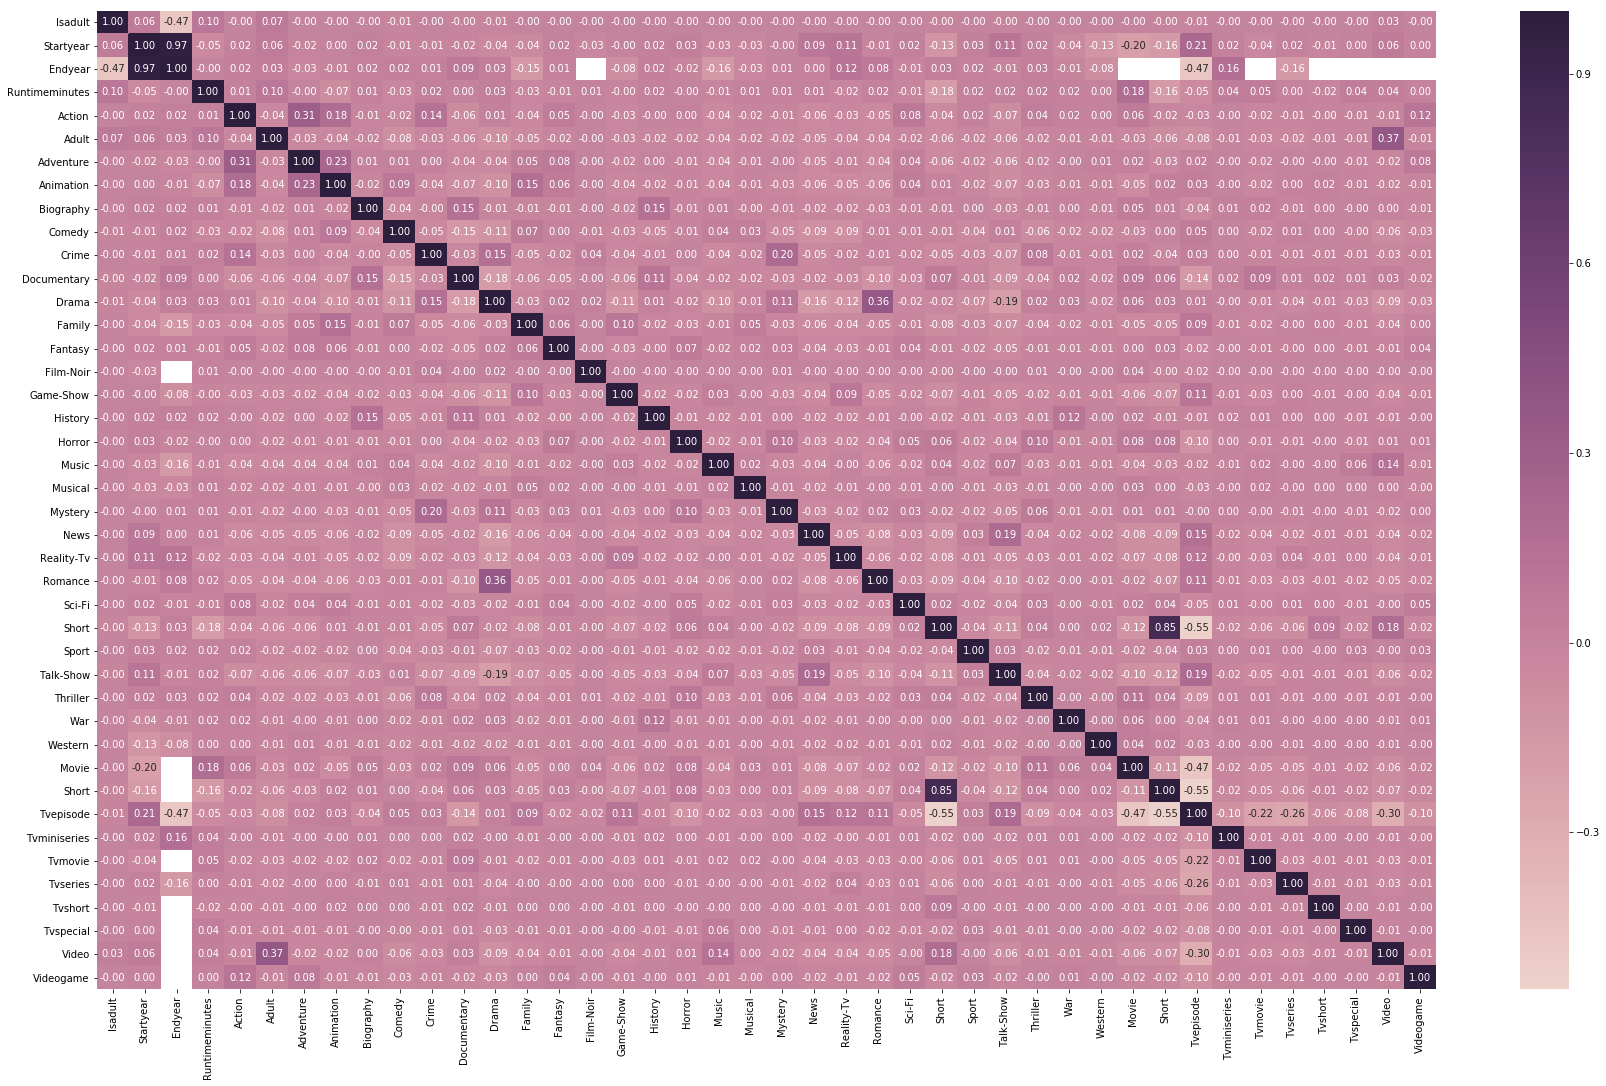

In [83]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(30,18))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax, fmt='.2f')